In [26]:
import json
from pprint import pprint
from collections import Counter

from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
!pwd

/Users/diwenzhu/version-control/asteroids


In [5]:
with open('logins (3).json') as data_file:    
    data = json.load(data_file)

In [7]:
data.keys()

dict_keys(['login_time'])

In [10]:
login_time = data['login_time']

In [12]:
print(len(login_time))

93142


In [17]:
Counter([len(x) for x in login_time])

Counter({19: 93142})

In [46]:
login_df = pd.DataFrame([datetime.strptime(x,'%Y-%m-%d %H:%M:%S') for x in login_time],columns=['login_time'])

In [47]:
login_df.set_index('login_time', inplace = True)
login_df['count'] = 1

In [48]:
login_ts = login_df.resample('15T', how = sum)

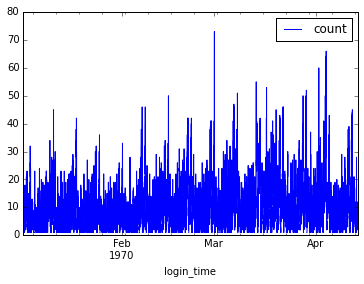

In [49]:
login_ts.plot()

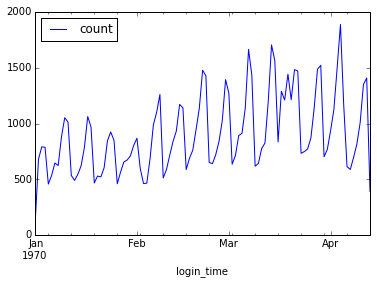

In [75]:
login_df.resample('1D', how = sum)['1970-01-01':'1971-01-10'].plot()